In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
"""" There are 1000 rows and 40 columns in dataset with both categorical and continous data.
all columns are filled. standard is found high in mulitple columns and there is difference between 75% to 100% data margin,Maybe there is outlier in data
dataset type needs to be converted according to them.Both date column in is object data type.

SyntaxError: EOF while scanning triple-quoted string literal (2012383326.py, line 3)

In [7]:
for i in df:
    print(df[i].value_counts())

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

In [8]:
df=df.drop('_c39',axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [10]:
le=LabelEncoder()

new=df[['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','auto_year','fraud_reported']]

In [11]:
for i in new:
    df[i]=le.fit_transform(df[[i]])

In [12]:
df

months_as_customer  age  policy_number policy_bind_date  policy_state  \
0                   328   48         521585       17-10-2014             2   
1                   228   42         342868       27-06-2006             1   
2                   134   29         687698       06-09-2000             2   
3                   256   41         227811       25-05-1990             0   
4                   228   44         367455       06-06-2014             0   
..                  ...  ...            ...              ...           ...   
995                   3   38         941851       16-07-1991             2   
996                 285   41         186934       05-01-2014             0   
997                 130   34         918516       17-02-2003             2   
998                 458   62         533940       18-11-2011             0   
999                 456   60         556080       11-11-1996             2   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        2               71610   
1         468176  ...          0                        0                5070   
2         430632  ...          3                        1               34650   
3         608117  ...          2                        1               63400   
4         610706  ...          1                        1                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        0               87200   
996       608177  ...          3                        0              108480   
997       442797  ...          3                        2               67500   
998       441714  ...          1                        2               46980   
999       612260  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0            6510           13020          52080         10          1   
1             780             780           3510          8         12   
2            7700            3850          23100          4         30   
3            6340            6340          50720          3         34   
4            1300             650           4550          0         31   
..            ...             ...            ...        ...        ...   
995         17440            8720          61040          6          6   
996         18080           18080          72320         13         28   
997          7500            7500          52500         11         19   
998          5220            5220          36540          1          5   
999           460             920           3680          8         12   

     auto_year  fraud_reported  
0            9               1  
1           12               1  
2           12               0  
3           19               1  
4           14               0  
..         ...             ...  
995         11               0  
996         20               

In [13]:
A=df.drop(['policy_bind_date','incident_date','policy_csl'],axis=1)

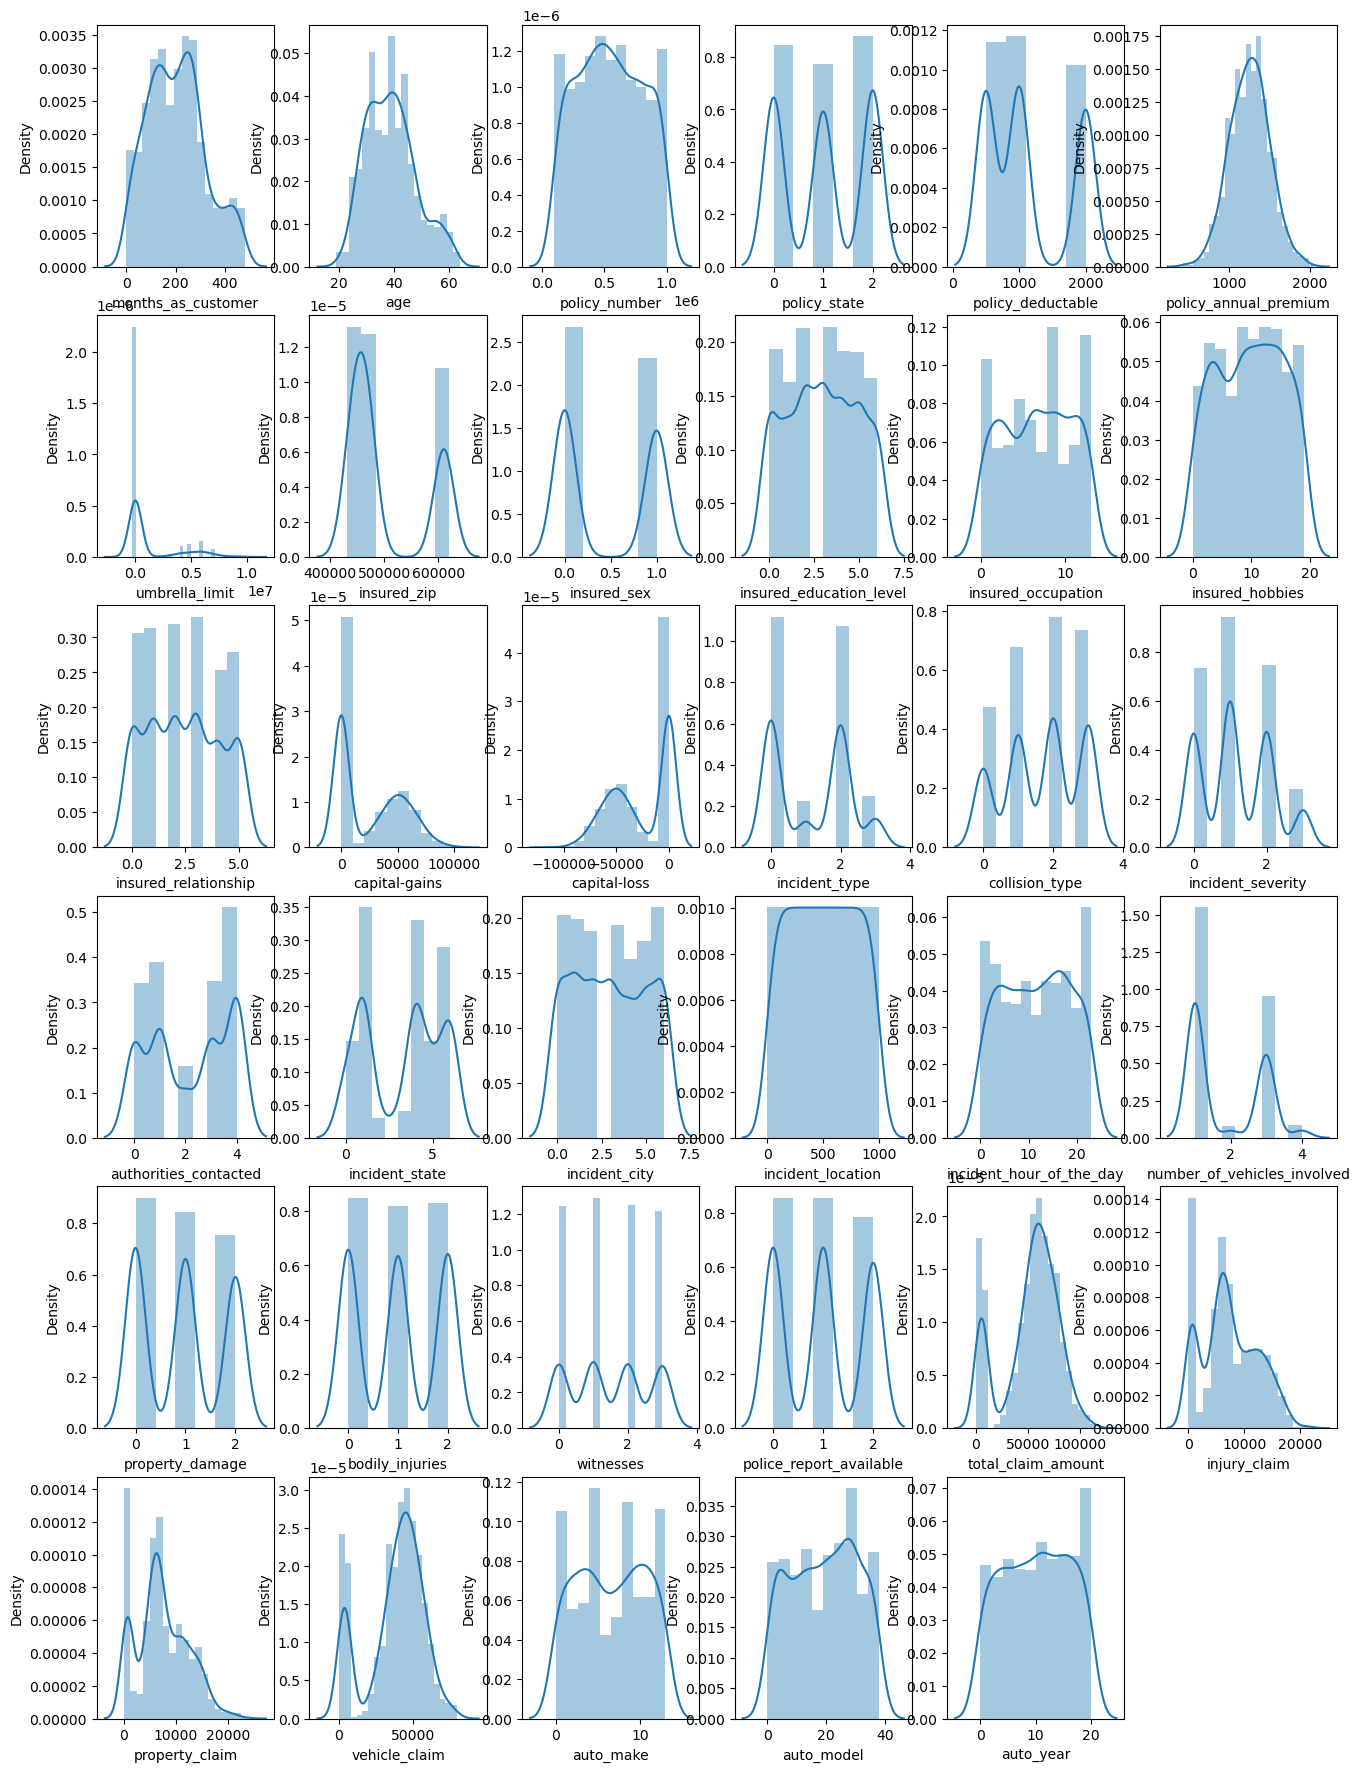

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(16,22))
p=1

for column in A:
    if p<=35:
        ax=plt.subplot(6,6,p)
        sns.distplot(A[column])
        p+=1
plt.show()
plt.tight_layout()

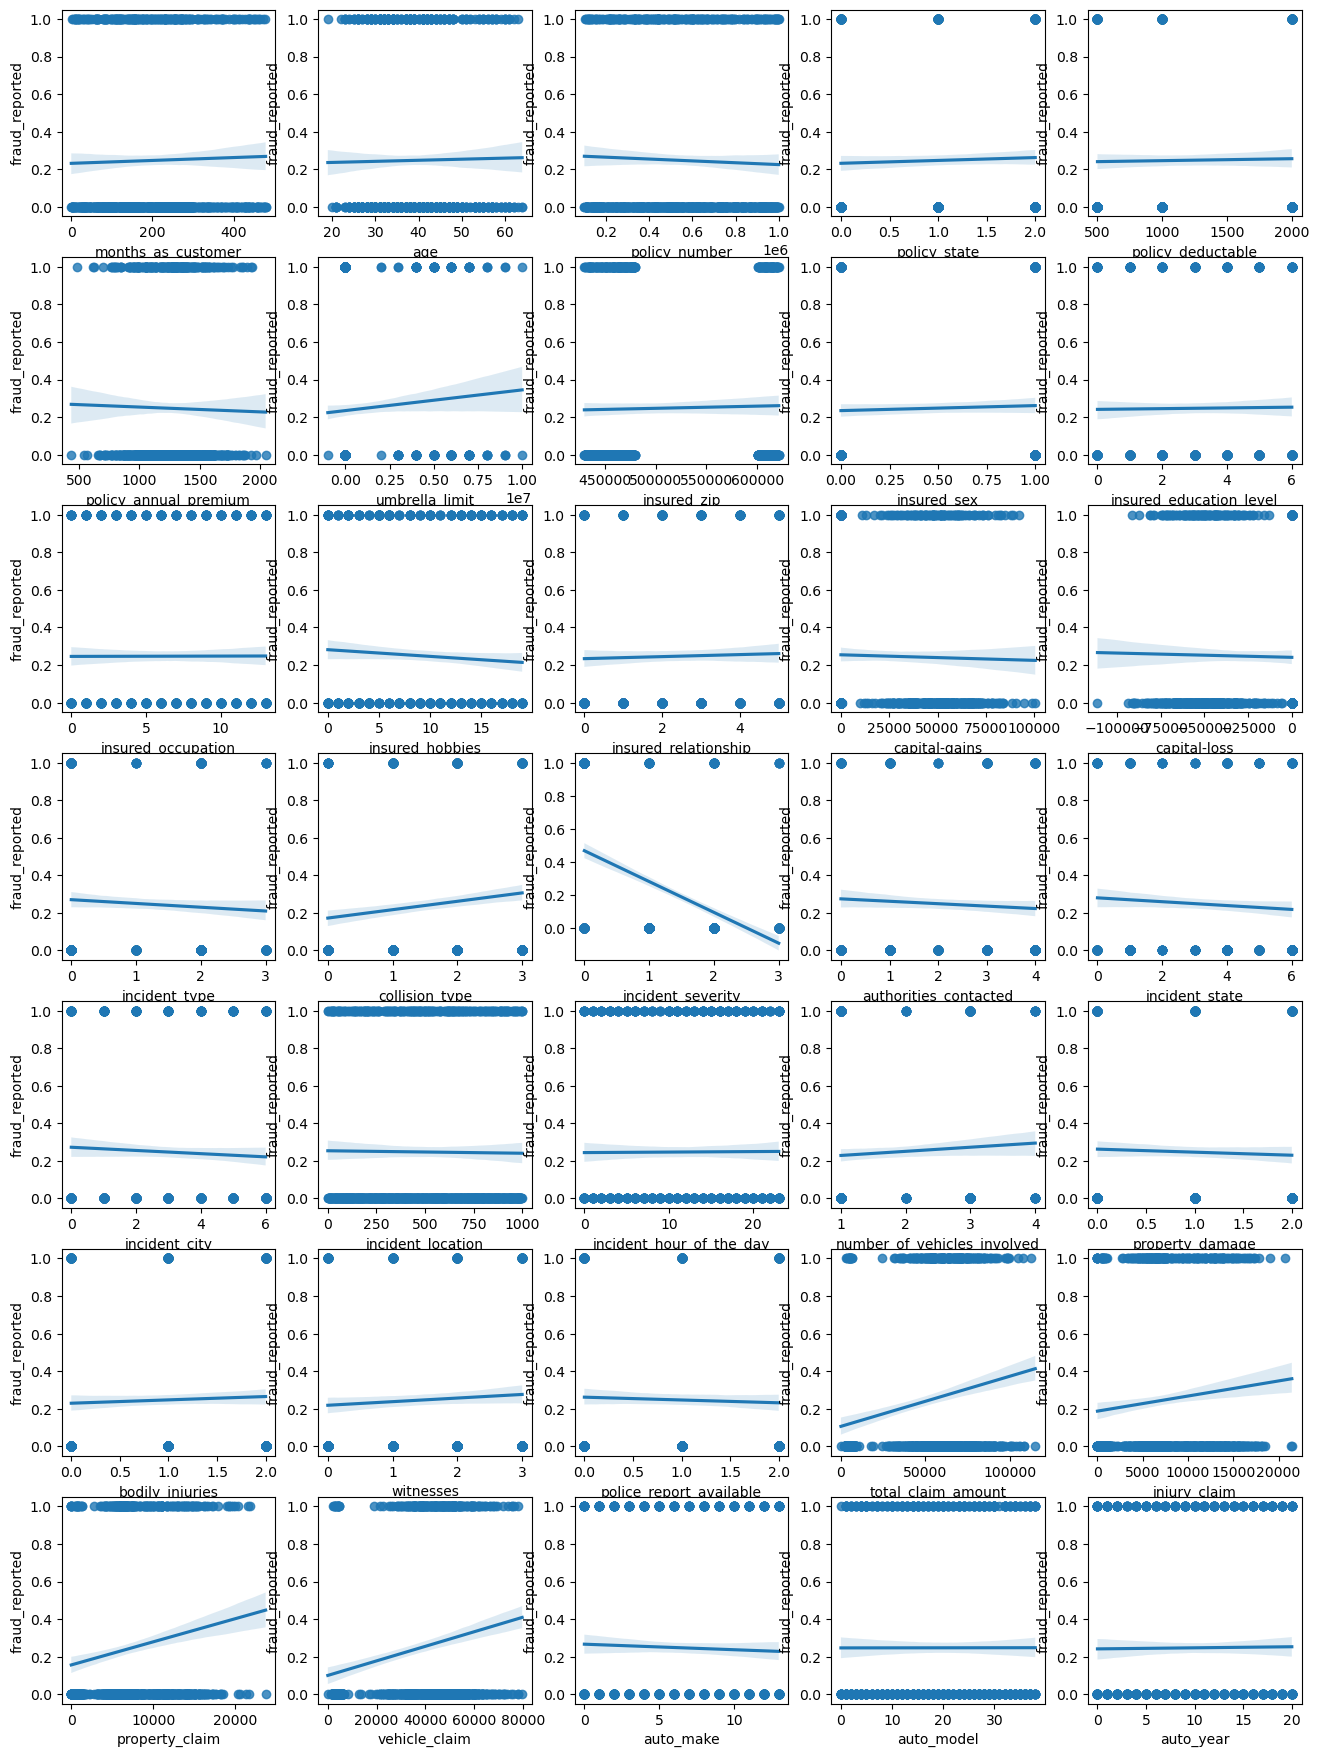

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(16,22))
p=1

for column in A:
    if p<=35:
        ax=plt.subplot(7,5,p)
        sns.regplot(A[column],A['fraud_reported'])
        p+=1
plt.show()
plt.tight_layout()

In [16]:
sns.scatterplot(df['policy_bind_date'],df['fraud_reported'],data=df )

<AxesSubplot:xlabel='policy_bind_date', ylabel='fraud_reported'>

In [17]:
df.drop(['policy_bind_date','incident_date','policy_csl'],axis=1,inplace=True)

<AxesSubplot:xlabel='witnesses', ylabel='fraud_reported'>

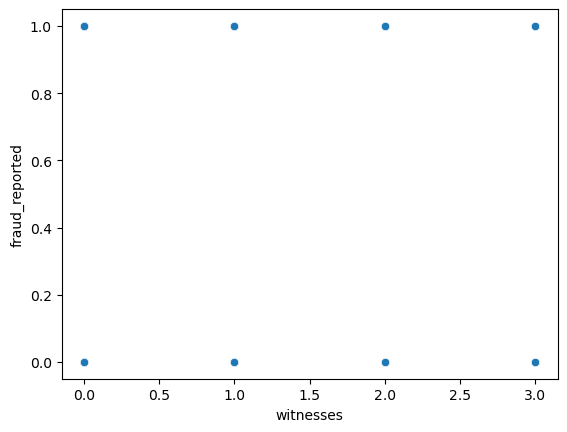

In [18]:
sns.scatterplot(df['witnesses'],df['fraud_reported'], data=df)

In [19]:
sns.scatterplot(df['months_as_customer'],df['fraud_reported'], data=df)

<AxesSubplot:xlabel='months_as_customer', ylabel='fraud_reported'>

<AxesSubplot:xlabel='age', ylabel='fraud_reported'>

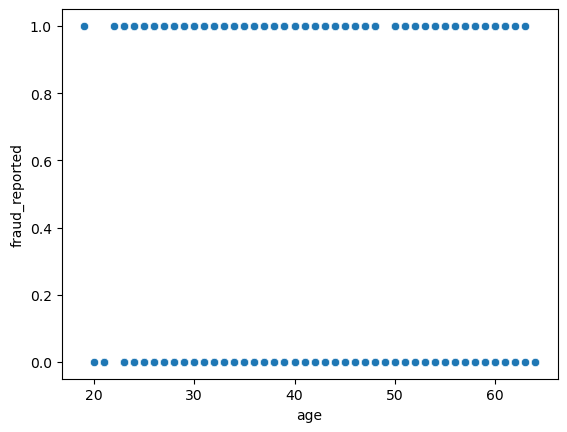

In [20]:
sns.scatterplot(df['age'],df['fraud_reported'], data=df)

<AxesSubplot:xlabel='injury_claim', ylabel='fraud_reported'>

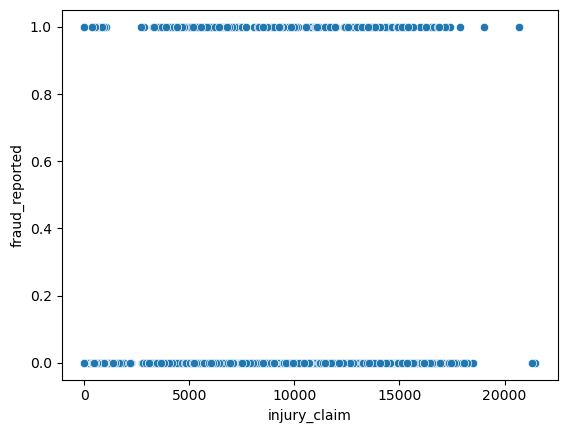

In [21]:
sns.scatterplot(df['injury_claim'],df['fraud_reported'], data=df)

<AxesSubplot:xlabel='property_claim', ylabel='fraud_reported'>

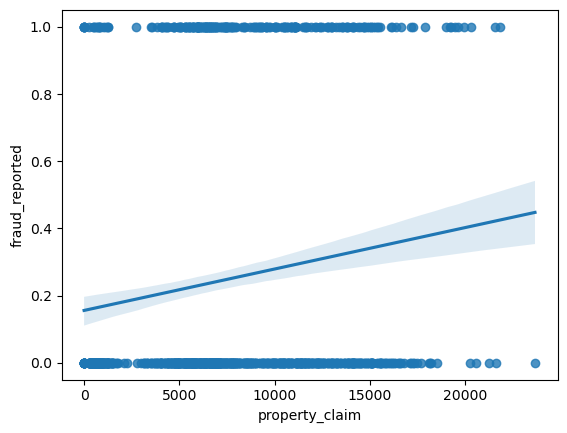

In [22]:
sns.regplot(df['property_claim'],df['fraud_reported'], data=df)

<AxesSubplot:xlabel='umbrella_limit', ylabel='fraud_reported'>

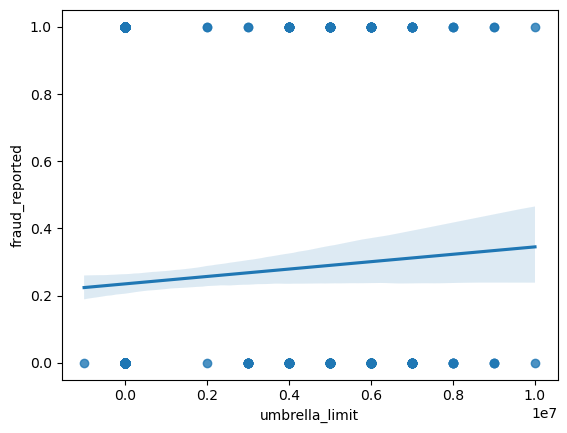

In [23]:
sns.regplot(df['umbrella_limit'],df['fraud_reported'], data=df)

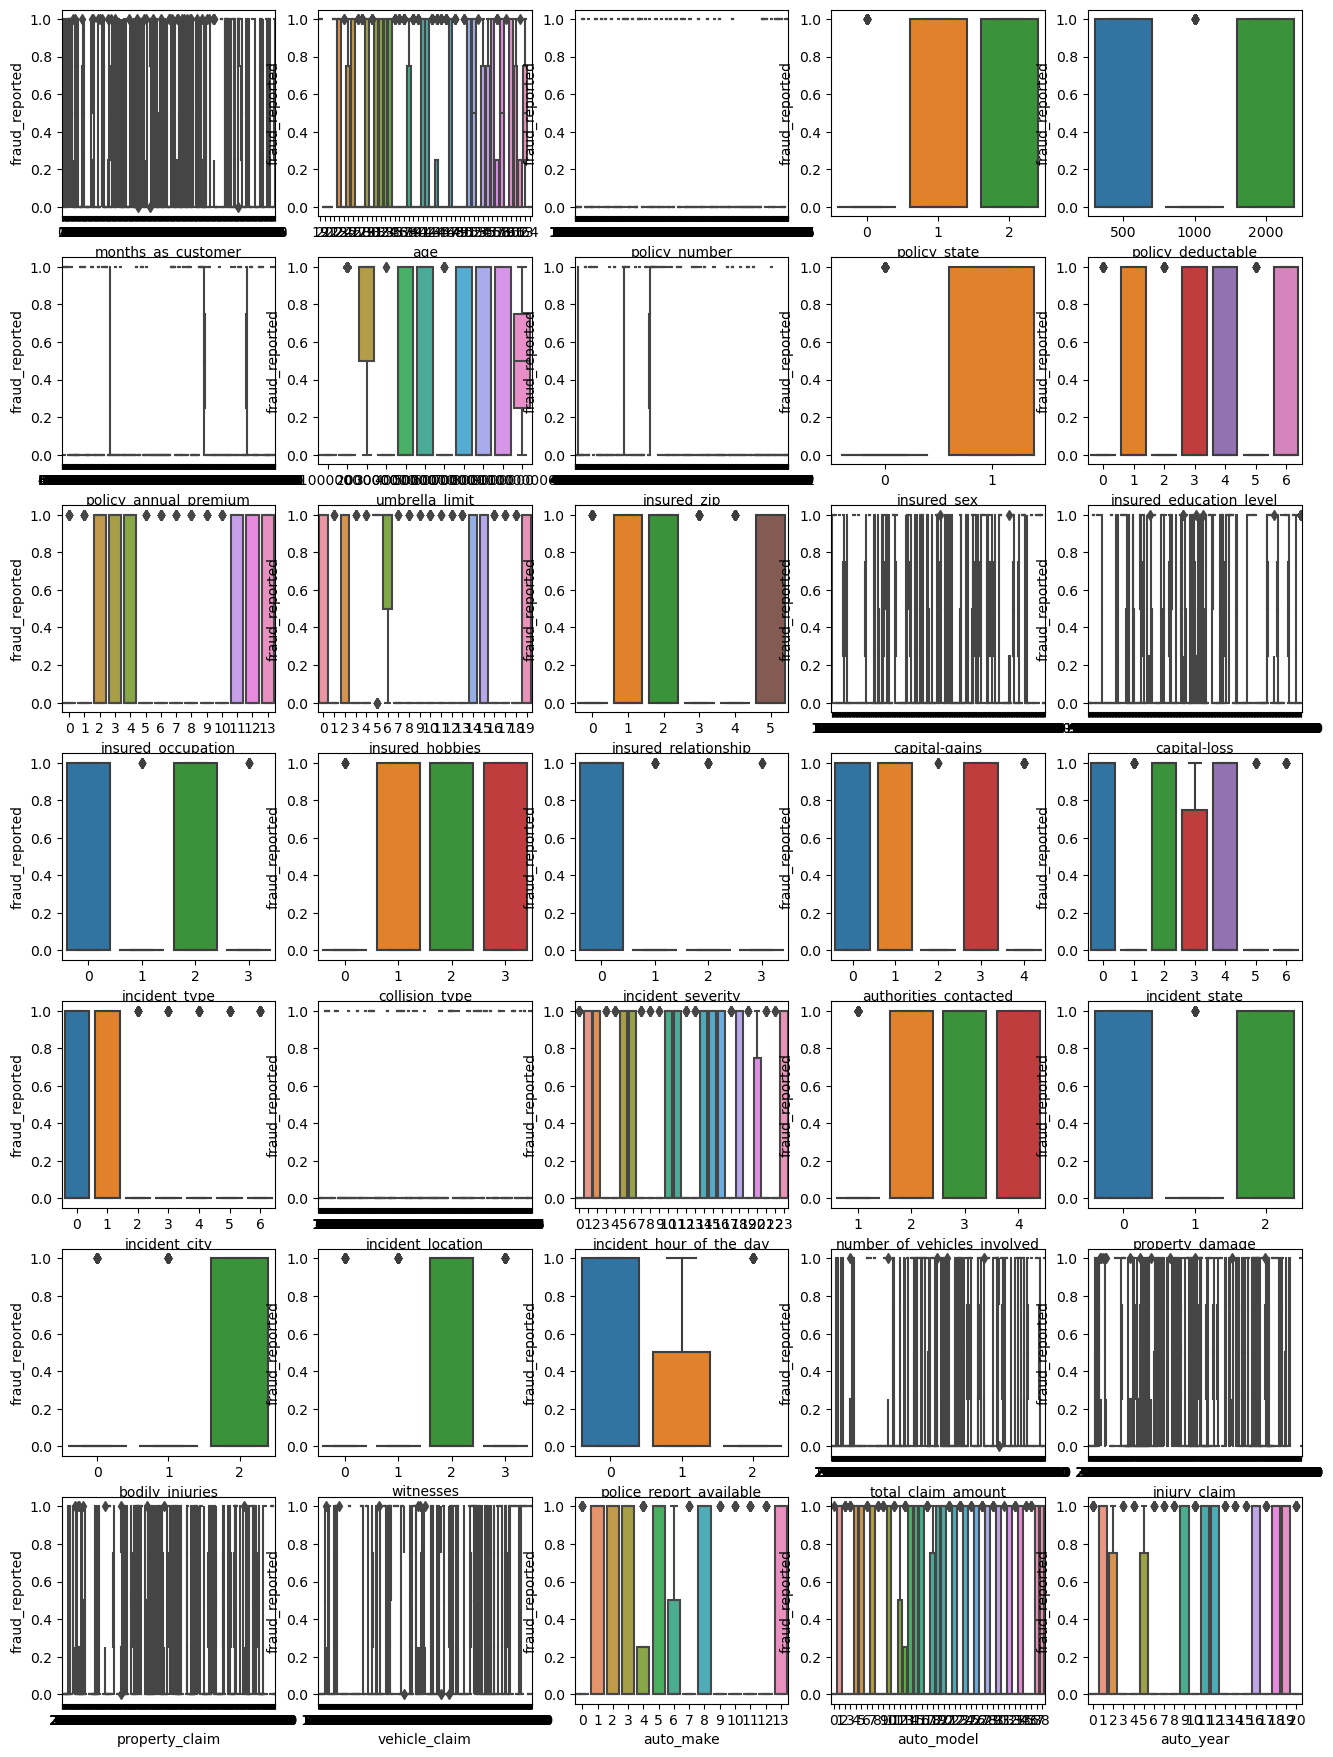

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(16,22))
p=1

for column in A:
    if p<=35:
        ax=plt.subplot(7,5,p)
        sns.boxplot(A[column],A['fraud_reported'])
        p+=1
plt.show()
plt.tight_layout()

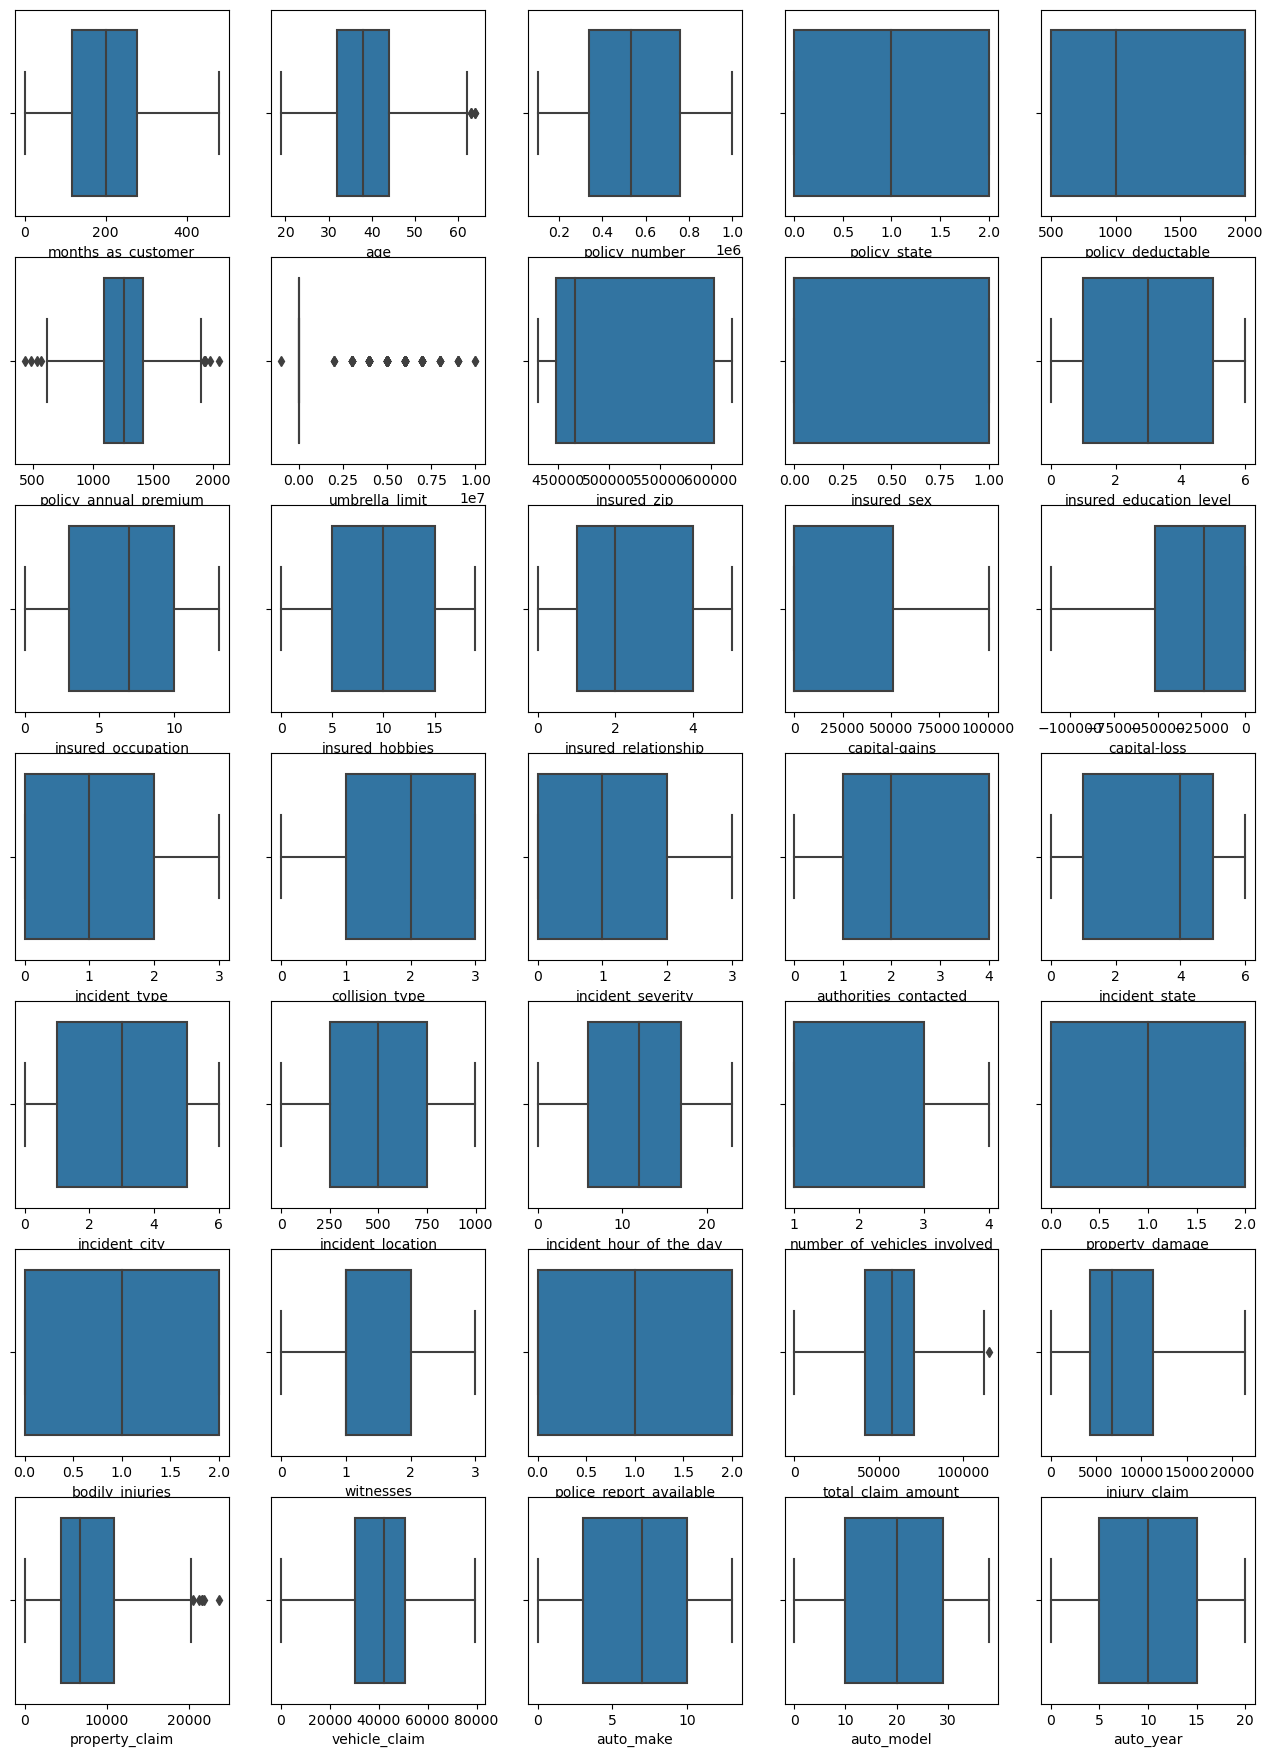

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(16,22))
p=1

for column in A:
    if p<=35:
        ax=plt.subplot(7,5,p)
        sns.boxplot(A[column])
        p+=1
plt.show()
plt.tight_layout()

In [26]:
q1=A.quantile(0.25)
q3=A.quantile(0.75)

iqr=q3-q1

In [27]:
outlier=A[~((A<(q1-1.5*iqr))|A>((q3+1.5*iqr)))]

In [28]:
outlier.shape

(1000, 36)

In [29]:
from scipy.stats import zscore
dlist=A[['property_claim','policy_annual_premium','umbrella_limit']]

z=np.abs(zscore(dlist))
z

property_claim  policy_annual_premium  umbrella_limit
0          1.165505               0.616705        0.479476
1          1.372696               0.242521        1.697980
2          0.736072               0.642233        1.697980
3          0.219722               0.652886        2.133471
4          1.399654               1.341980        2.133471
..              ...                    ...             ...
995        0.273817               0.222884        0.479476
996        2.214794               0.739141        0.479476
997        0.020826               0.520739        0.826998
998        0.451976               0.411866        1.697980
999        1.343664               2.008710        0.479476

[1000 rows x 3 columns]

In [30]:
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 875, 922, 975], dtype=int64),
 array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2],
       dtype=int64))

In [31]:
dff=A[(z<3).all(axis=1)]

dff.shape

(981, 36)

In [32]:
plt.figure(figsize=(16,22))
p=1

for column in dff:
    if p<=35:
        ax=plt.subplot(7,5,p)
        sns.boxplot(dff[column])
        p+=1
plt.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

<AxesSubplot:>

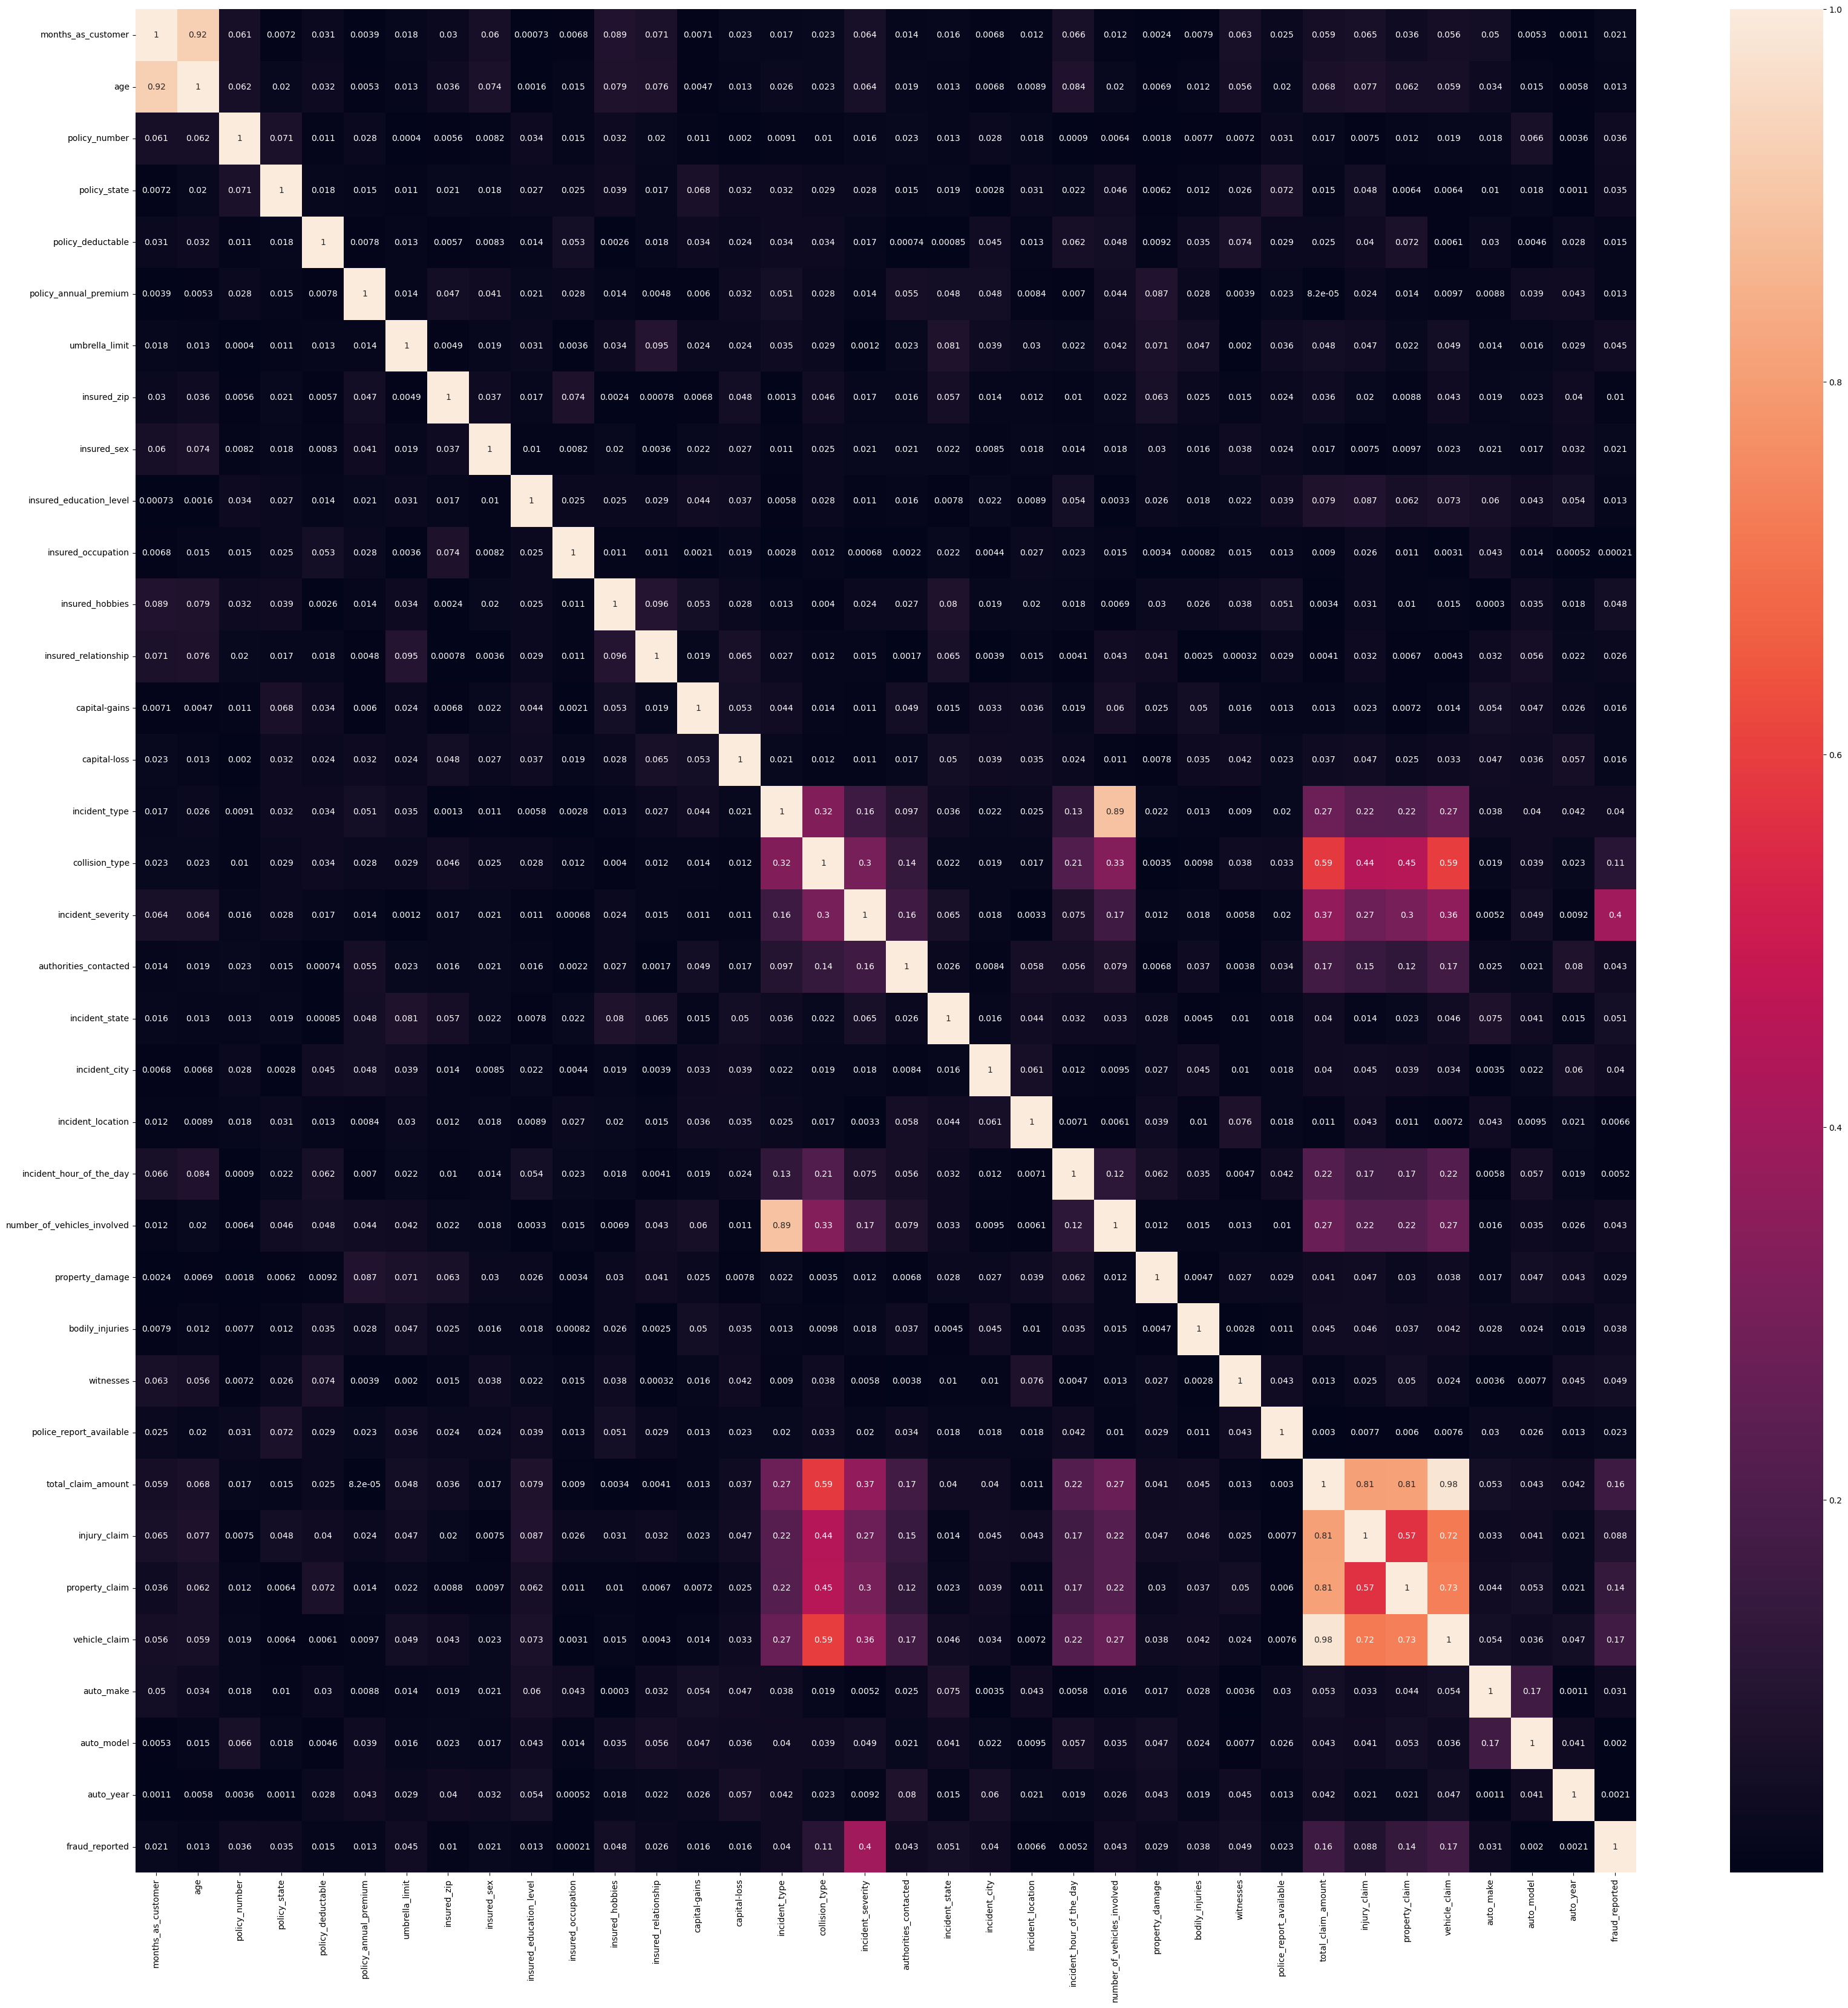

In [33]:
plt.figure(figsize=(40,40))
sns.heatmap(dff.corr().abs(),annot=True)

In [34]:
#umberlla limit is having a lot of outliers and not much related to any feature not relatesd to target so can be drop for good model understandings
#age and month as customer is highly co related.Age is less realted to target so droping age.
#incident type and number of vehicle involved is multico linear.Incident type is less related so droping it.
#total claim amount is highly mulitcolinear with 3 features

In [35]:
dff.drop(['umbrella_limit','age','incident_type','total_claim_amount'],axis=1, inplace=True)

<AxesSubplot:>

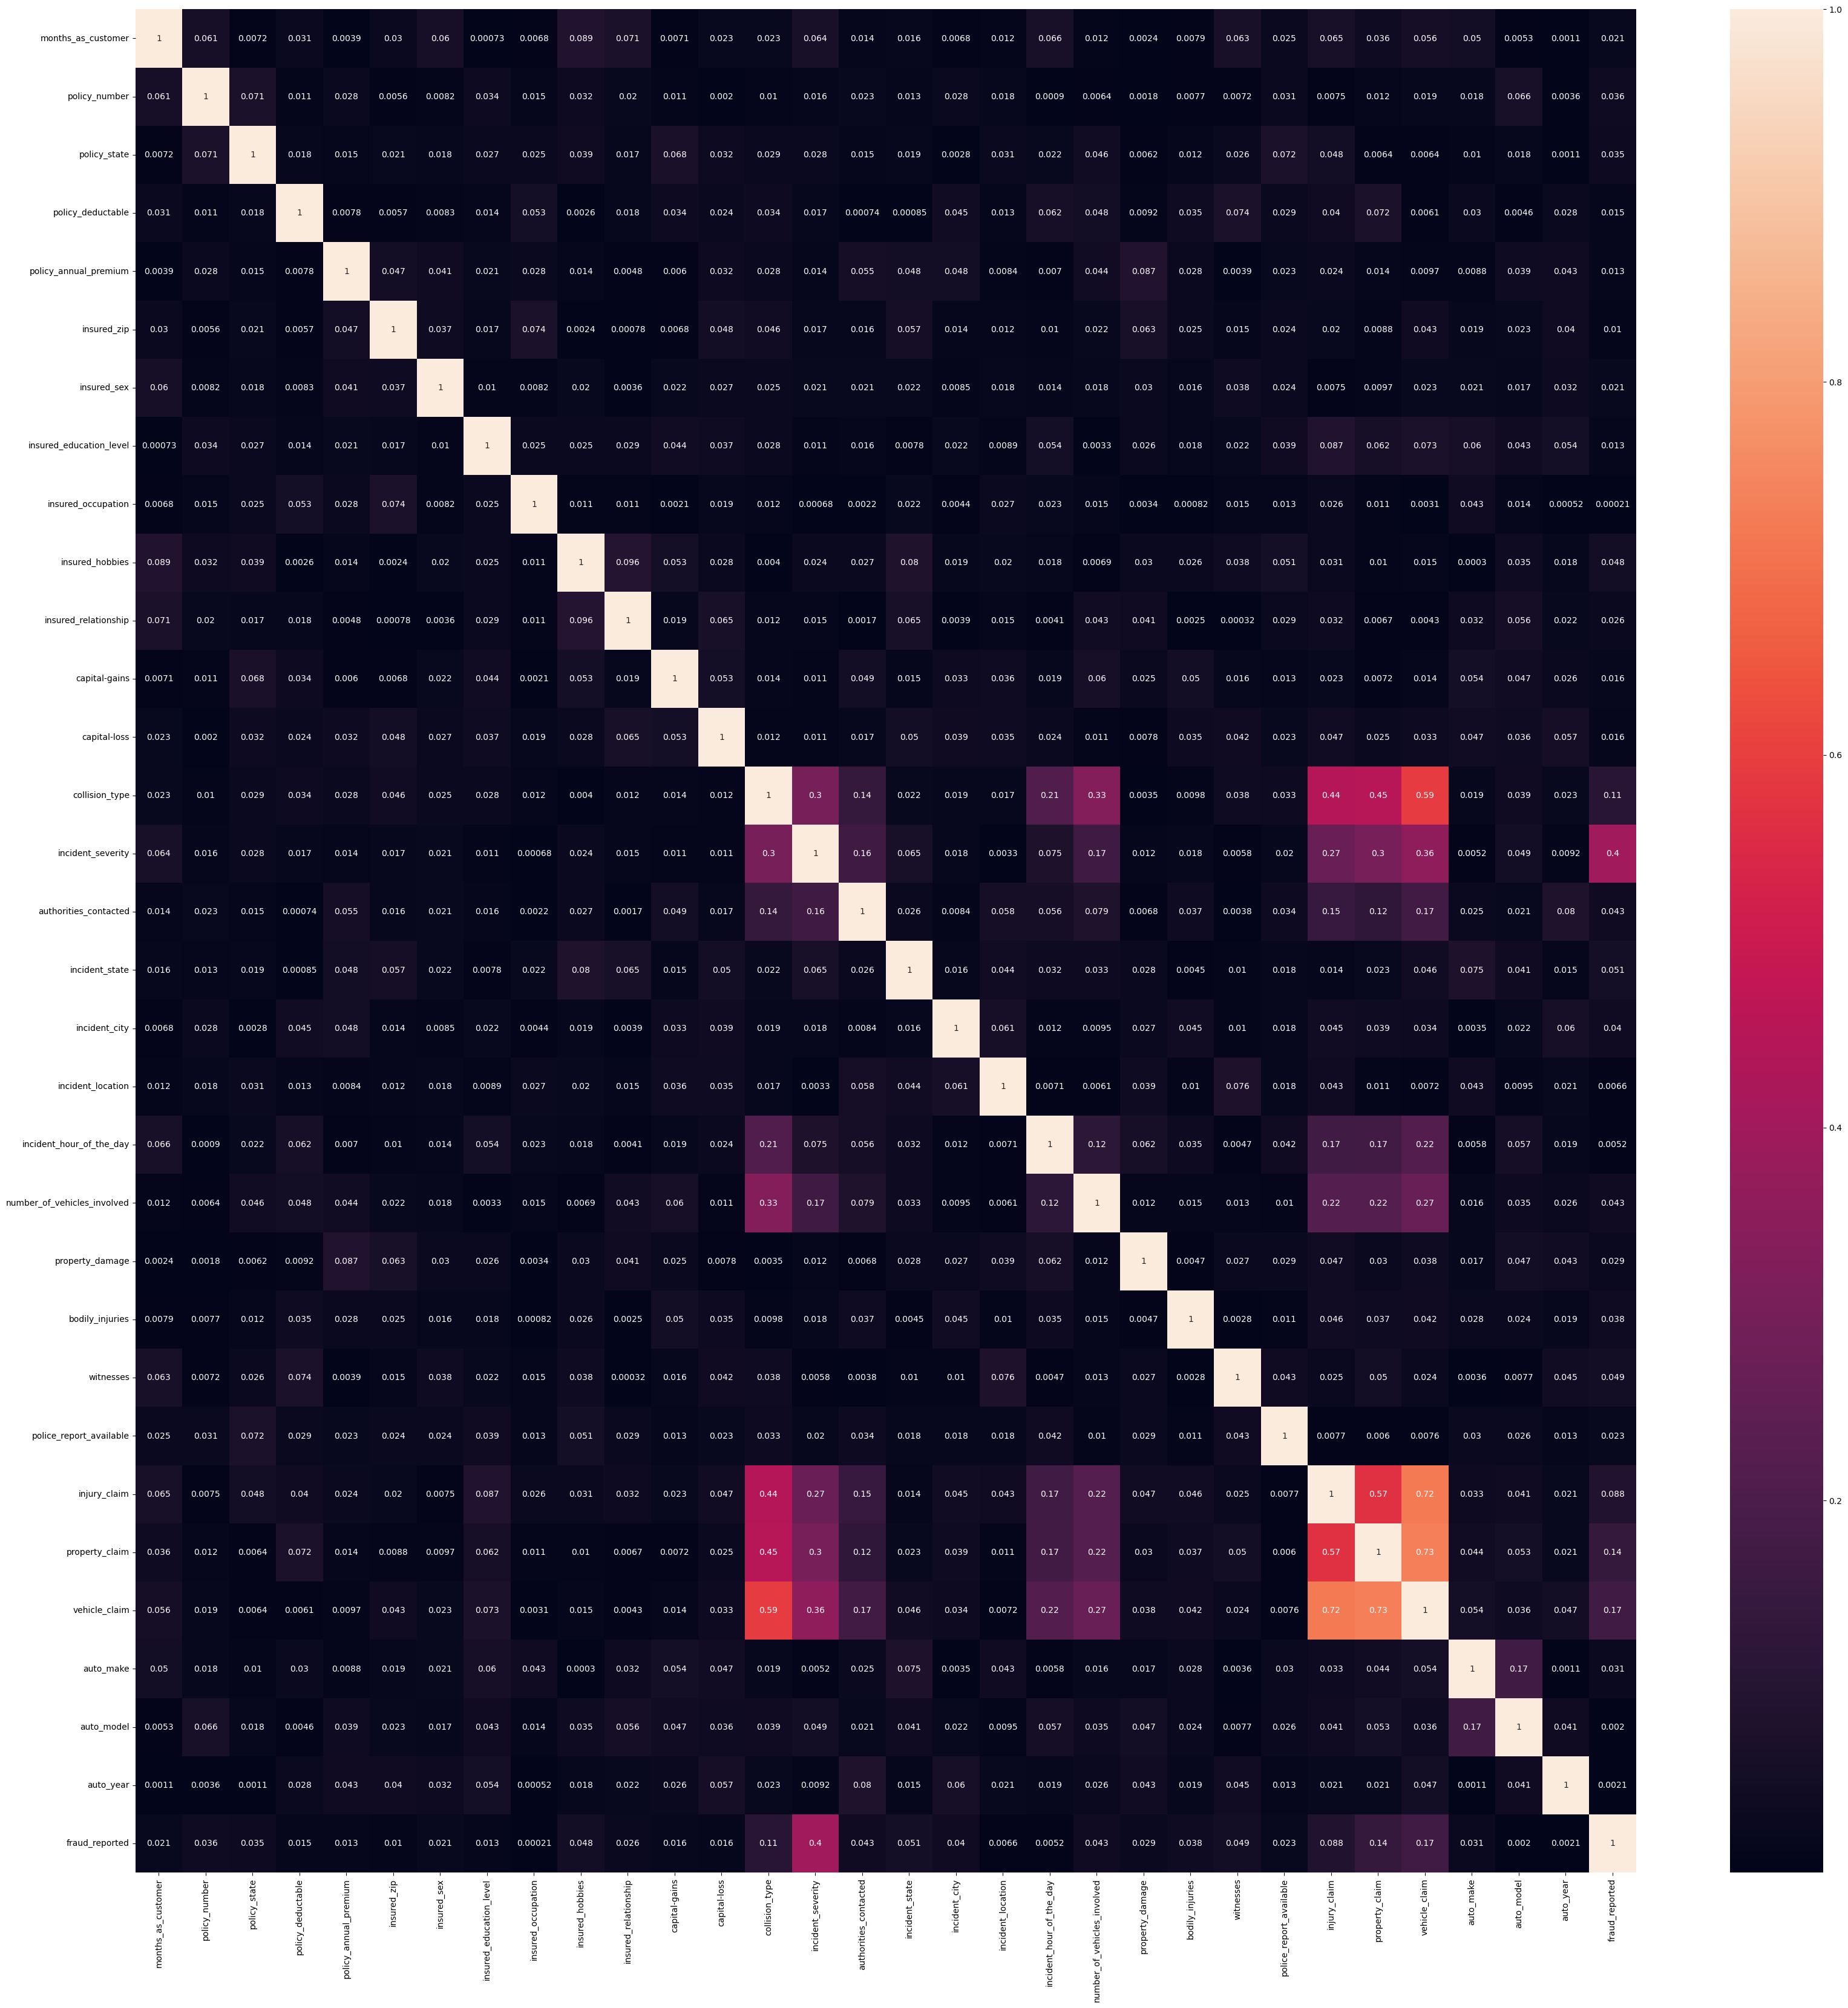

In [36]:
plt.figure(figsize=(40,40))
sns.heatmap(dff.corr().abs(),annot=True)

In [37]:
dff.drop('vehicle_claim',axis=1, inplace=True)

In [38]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:>

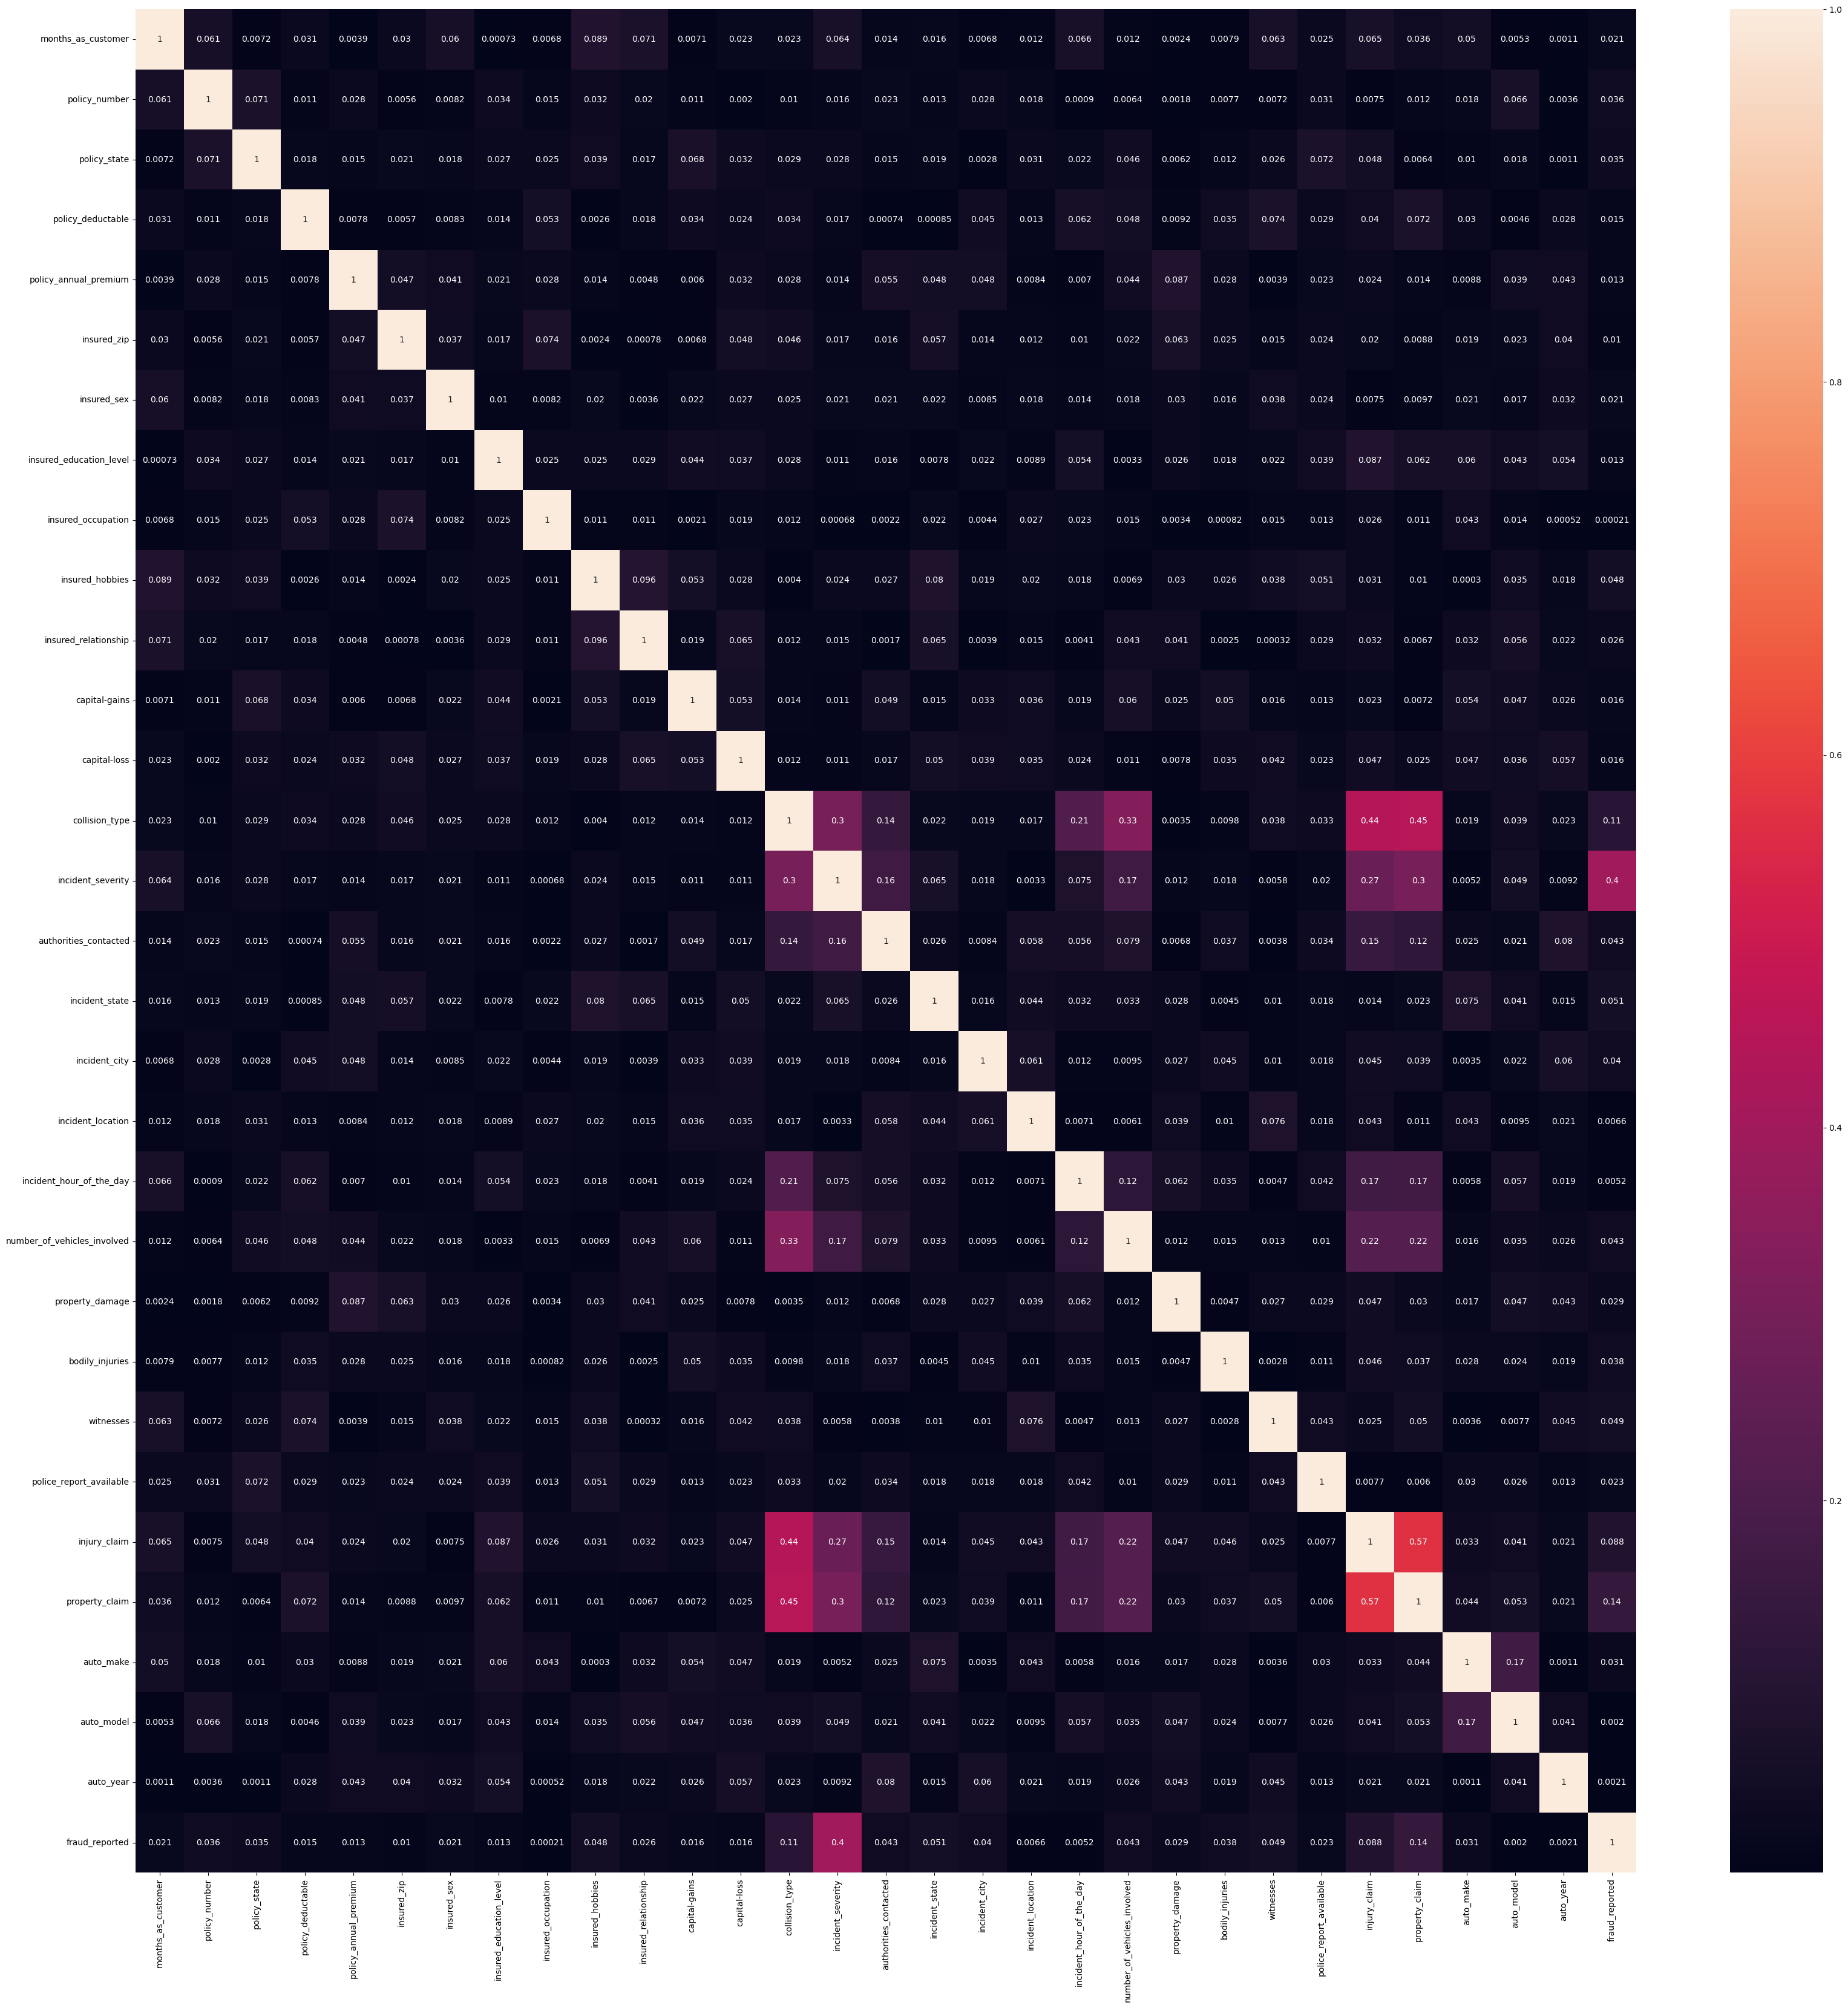

In [39]:
plt.figure(figsize=(40,40))
sns.heatmap(dff.corr().abs(),annot=True)

In [40]:
dff.drop('injury_claim',axis=1, inplace=True)

In [41]:
dff.columns

Index(['months_as_customer', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'property_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [42]:
dff.drop(['policy_number','insured_zip'], axis=1, inplace=True)

In [43]:
X=dff.drop('fraud_reported', axis=1)
y=dff['fraud_reported']

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
std=StandardScaler()

scld=std.fit_transform(X)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(scld,y,test_size=0.25, random_state=100)

In [51]:
smote=SMOTE(k_neighbors=2,random_state=155)

x_train_s,y_train_s=smote.fit_resample(x_train,y_train)

In [52]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_s))

Counter({0: 554, 1: 181})
Counter({0: 554, 1: 554})


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
ln=LogisticRegression()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    ln.fit(x_train,y_train)

    pred=ln.predict(x_train)
    acc=accuracy_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)


0.8272108843537415
360


In [54]:
ln.fit(x_train_s,y_train_s)

ypred=ln.predict(x_train_s)
acc_train=accuracy_score(ypred,y_train_s)
print('Best training accuracy is',acc_train)

pred=ln.predict(x_test)
acc_test=accuracy_score(pred,y_test)  
print('Best test accuracy is',acc_test)

Best training accuracy is 0.7545126353790613
Best test accuracy is 0.7235772357723578


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
cross_val_score(ln,X,y,cv=10).mean()

0.7563698206555348

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
kn=KNeighborsClassifier()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    kn.fit(x_train,y_train)

    pred=kn.predict(x_train)
    acc=accuracy_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)


0.8285714285714286
42


In [58]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=42)
kn.fit(x_train,y_train)

ypred=kn.predict(x_train)
acc_train=accuracy_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=kn.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.8285714285714286
Best test accuracy is 0.6829268292682927


In [59]:
kn.fit(x_train_s,y_train_s)

ypred=kn.predict(x_train_s)
acc_train=accuracy_score(ypred,y_train_s)
print('Best training accuracy is',acc_train)

pred=kn.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.8050541516245487
Best test accuracy is 0.7113821138211383


In [60]:
from sklearn.model_selection import GridSearchCV

In [66]:
param={'algorithm':['brute','kd_tree'],
      'leaf_size':[1,2,3,4,5,6],
      'n_neighbors':[1,2,3,4,5,6]
      }

In [67]:
gd=GridSearchCV(kn,param_grid=param)

In [68]:
gd.fit(x_train_s,y_train_s)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'kd_tree'],
                         'leaf_size': [1, 2, 3, 4, 5, 6],
                         'n_neighbors': [1, 2, 3, 4, 5, 6]})

In [71]:
gd.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=2)

In [73]:
knn=KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=2)

In [74]:
knn.fit(x_train_s,y_train_s)

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=2)

In [84]:
ypred=knn.predict(x_train_s)
acc_train=accuracy_score(ypred,y_train_s)
print('Best training accuracy is',acc_train)

pred=knn.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 0.9972924187725631
Best test accuracy is 0.8902439024390244
[[181  16]
 [ 11  38]]


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
dt=DecisionTreeClassifier()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    dt.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=accuracy_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)


1.0
1


In [82]:
ypred=dt.predict(x_train)
acc_train=accuracy_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=dt.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 1.0
Best test accuracy is 0.7804878048780488
[[156  41]
 [ 13  36]]


In [83]:
ypred=dt.predict(x_train_s)
acc_train=accuracy_score(ypred,y_train_s)
print('Best training accuracy is',acc_train)

pred=dt.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 0.8772563176895307
Best test accuracy is 0.7804878048780488
[[156  41]
 [ 13  36]]


In [100]:
param={'criterion':['ginni','entropy'],
      'max_leaf_nodes':[1,2,3,4,5,6],
      
      'max_depth':[1,2,3,4,5],
      'min_samples_leaf':[1,2,3,4,5,6,7],
      'random_state':[100,150,200,300,350,400]}

In [101]:
Gd=GridSearchCV(dt,param_grid=param)

In [102]:
Gd.fit(x_train_s,y_train_s)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'random_state': [100, 150, 200, 300, 350, 400]})

In [103]:
Gd.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4,
                       random_state=100)

In [104]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4,
                       random_state=100)

In [105]:
dt.fit(x_train_s,y_train_s)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4,
                       random_state=100)

In [106]:
ypred=dt.predict(x_train_s)
acc_train=accuracy_score(ypred,y_train_s)
print('Best training accuracy is',acc_train)

pred=dt.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 0.8664259927797834
Best test accuracy is 0.8455284552845529
[[160  37]
 [  1  48]]


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
rf=RandomForestClassifier()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    rf.fit(x_train,y_train)

    pred=rf.predict(x_train)
    acc=accuracy_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)


1.0
1


In [109]:
ypred=rf.predict(x_train_s)
acc_train=accuracy_score(ypred,y_train_s)
print('Best training accuracy is',acc_train)

pred=rf.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 0.8971119133574007
Best test accuracy is 0.8130081300813008
[[168  29]
 [ 17  32]]
